# Интерактивное представление результатов прогнозирования

In [70]:
import numpy as np
import pandas as pd

In [71]:
import datetime as dt
import panel as pn
from panel.interact import interact, interactive, fixed, interact_manual
pn.extension()

In [72]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
import matplotlib.pyplot as plt

%matplotlib inline

In [73]:
regions = pd.read_csv('regions.csv', sep = ';')
regions

,region,west,east,south,north
0,1,-74.255590,-74.244478,40.496120,40.504508
1,2,-74.255590,-74.244478,40.504508,40.512896
2,3,-74.255590,-74.244478,40.512896,40.521285
3,4,-74.255590,-74.244478,40.521285,40.529673
4,5,-74.255590,-74.244478,40.529673,40.538061
...,...,...,...,...,...
2495,2496,-73.711122,-73.700010,40.873589,40.881977
2496,2497,-73.711122,-73.700010,40.881977,40.890365
2497,2498,-73.711122,-73.700010,40.890365,40.898754
2498,2499,-73.711122,-73.700010,40.898754,40.907142


In [74]:
nRegions = pd.read_csv('nonzero_regions.csv').iloc[:,1]
nRegions

0      1075
1      1076
2      1077
3      1125
4      1126
       ... 
97     2068
98     2069
99     2118
100    2119
101    2168
Name: 0, Length: 102, dtype: int64

In [75]:
forecast = pd.read_csv('forecast.csv')
forecast.time = pd.to_datetime(forecast.time)
forecast

,time,y3,y5,y1,y4,y6,y2,p1,p2,p3,p4,p5,p6,reg
0,2016-05-31 23:00:00,5.0,1.0,26.0,2.0,7.0,14.0,20.437786,12.797665,5.308792,2.489145,3.570617,-1.430789,1075
1,2016-06-01 00:00:00,2.0,7.0,14.0,1.0,23.0,5.0,15.840590,6.997683,5.162610,6.159503,9.433222,23.594637,1075
2,2016-06-01 01:00:00,1.0,23.0,5.0,7.0,34.0,2.0,5.374065,3.900729,4.860006,10.779229,21.945648,51.088463,1075
3,2016-06-01 02:00:00,7.0,34.0,2.0,23.0,72.0,1.0,3.966870,4.875349,11.151024,22.262970,49.118572,81.778120,1075
4,2016-06-01 03:00:00,23.0,72.0,1.0,34.0,54.0,7.0,4.342900,9.599047,20.957472,50.464120,83.582794,68.052810,1075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72925,2016-06-30 13:00:00,2.0,1.0,0.0,1.0,1.0,0.0,11.180874,5.662654,7.215169,5.248611,2.875281,7.211087,2168
72926,2016-06-30 14:00:00,1.0,1.0,0.0,1.0,0.0,2.0,1.268812,3.726263,3.370064,2.988127,8.562842,10.386863,2168
72927,2016-06-30 15:00:00,1.0,0.0,2.0,1.0,1.0,1.0,2.196055,3.040368,1.611872,9.144300,7.267639,14.228094,2168
72928,2016-06-30 16:00:00,1.0,1.0,1.0,0.0,0.0,1.0,0.912981,2.816207,9.109515,8.367270,10.231588,15.348121,2168


In [76]:
hourSelect = pn.widgets.Select(name = 'Выберите, на сколько часов показать прогноз', value = 1, options = [1, 2, 3, 4, 5, 6])

regSelect = pn.widgets.Select(name = 'Выберите регион из списка', value = 1075, options = list(nRegions))

display(hourSelect, regSelect)

Select(name='Выберите, на с..., options=[1, 2, 3, 4, 5, 6], value=1)

Select(name='Выберите регион и..., options=[1075, 1076, 1077, ...], value=1075)

In [77]:
dateSlider = pn.widgets.DateSlider(name = 'Задайте дату конца истории', start = dt.datetime(2016, 6, 1).date(), end = dt.datetime(2016, 6, 30).date(), as_datetime = True)

hourSlider = pn.widgets.IntSlider(name = 'Задайте час конца истории', value = 6, start = 0, end = 23)
display(dateSlider, hourSlider)

DateSlider(as_datetime=True, end=datetime.date(2016, ..., name='Задайте дату к..., start=datetime.date(2016, 6, 1), value=datetime.date(2016, 6, 1))

IntSlider(end=23, name='Задайте час к..., value=6)

In [78]:
def dateHour(event):
    if event.new == dt.datetime(2016, 6, 30).date():
        hourSlider.end = 17
        if hourSlider.value > 17:
            hourSlider.value = 17
    else:
        hourSlider.end = 23

dateSlider.param.watch(dateHour, 'value')

Watcher(inst=DateSlider(as_datetime=True, end=datetime.date(2016, ..., name='Задайте дату к..., start=datetime.date(2016, 6, 1), value=datetime.date(2016, 6, 1)), cls=<class 'panel.widgets.slider.DateSlider'>, fn=<function dateHour at 0x000002C3D2B69D30>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

In [79]:
DateWidget = pn.WidgetBox(dateSlider, hourSlider)
DateWidget

WidgetBox
    [0] DateSlider(as_datetime=True, end=datetime.date(2016, ..., name='Задайте дату к..., start=datetime.date(2016, 6, 1), value=datetime.date(2016, 6, 1))
    [1] IntSlider(end=23, name='Задайте час к..., value=6)

In [80]:
predWidget = pn.WidgetBox(regSelect, hourSelect)
predWidget

WidgetBox
    [0] Select(name='Выберите регион и..., options=[1075, 1076, 1077, ...], value=1075)
    [1] Select(name='Выберите, на с..., options=[1, 2, 3, 4, 5, 6], value=1)

In [81]:
def drawSer(date, hour, reg, col):
    respCol = ['y1', 'y2', 'y3', 'y4', 'y5', 'y6']
    predCol = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
    figure  = Figure(figsize = (6, 3))
    FigureCanvas(figure)
    ax = figure.add_subplot()
    df = pd.DataFrame(forecast[forecast.reg == reg][[respCol[col - 1], predCol[col - 1]]].iloc[400:])
    ax.plot(df[forecast.time > dt.datetime(date.year, date.month, date.day, hour)])
    ax.legend(['Истинные данные', 'Прогноз XGBoost'], loc = 1)
    return figure

In [82]:
dataVis = pn.Row(DateWidget, predWidget)
plotting = pn.bind(drawSer, dateSlider, hourSlider, regSelect, hourSelect)

In [83]:
page1 = pn.Column("<br>\n# Прогнозы количества поездок", dataVis, plotting, name = 'График')

C:\Users\poklo\AppData\Local\Temp/ipykernel_12628/736683208.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.plot(df[forecast.time > dt.datetime(date.year, date.month, date.day, hour)])


In [84]:
import folium
import branca.colormap as cm

In [85]:
colormap = cm.LinearColormap(colors = ['blue', 'green', 'yellow', 'orange', 'red'], index = np.round(np.linspace(0, 1000, 5)), vmin = 0, vmax = 1000)
colormap

In [86]:
hourSelect1 = pn.widgets.Select(name = 'Выберите, на сколько часов показать прогноз', value = 1, options = [1, 2, 3, 4, 5, 6])

dateSlider1 = pn.widgets.DateSlider(name = 'Задайте дату конца истории', start = dt.datetime(2016, 6, 1).date(), end = dt.datetime(2016, 6, 30).date())

hourSlider1 = pn.widgets.IntSlider(name = 'Задайте час конца истории', value = 6, start = 0, end = 23)

In [87]:
def dateHour1(event):
    if event.new == dt.datetime(2016, 6, 30).date():
        hourSlider1.end = 17
        if hourSlider1.value > 17:
            hourSlider1.value = 17
    else:
        hourSlider1.end = 23

dateSlider1.param.watch(dateHour1, 'value')

Watcher(inst=DateSlider(end=datetime.date(2016, ..., name='Задайте дату к..., start=datetime.date(2016, 6, 1), value=datetime.date(2016, 6, 1)), cls=<class 'panel.widgets.slider.DateSlider'>, fn=<function dateHour1 at 0x000002C3CD02CB80>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

In [88]:
Colms = [['y1', 'y2', 'y3', 'y4', 'y5', 'y6'], ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']]

In [89]:
m1 = folium.Map(location = [40.748441, -73.985664], tiles = 'OpenStreetMap', min_zoom = 11, max_zoom = 13)
m2 = folium.Map(location = [40.748441, -73.985664], tiles = 'OpenStreetMap', min_zoom = 11, max_zoom = 13)

In [90]:
accept = pn.widgets.Button(name = 'Применить', value = False)

foliumPane1 = pn.pane.plot.Folium(m1, height = 500, width = 500)
foliumPane2 = pn.pane.plot.Folium(m2, height = 500, width = 500)

def updateMap(event): 
    if (event.new == True):
        time0 = dt.datetime.strptime(str(dateSlider1.value), '%Y-%m-%d')
        time0 = time0.replace(hour = hourSlider1.value)
        lag = hourSelect1.value
        
        m1 = folium.Map(location = [40.748441, -73.985664], tiles = 'OpenStreetMap', min_zoom = 11, max_zoom = 13)
        m2 = folium.Map(location = [40.748441, -73.985664], tiles = 'OpenStreetMap', min_zoom = 11, max_zoom = 13)
        
        for i in range(regions.shape[0]):
            color = [0, 0] # Заполняющий цвет
            NumTrips = [0, 0] # Количество поездок
            fillInd = [0, 0] # Непрозрачность цвета
            if(i + 1) in list(nRegions):
                for nMap in range(2):
                    NumTrips[nMap] = int(forecast[(forecast.reg == (i + 1)) & (forecast.time == time0)][Colms[nMap][lag - 1]].iloc[0])
                    color[nMap] = colormap(NumTrips[nMap]) # Положение количества поездок на цветовой шкале
                
                    # При небольшом количестве поездок лучше закрасить более прозрачным цветом
                    if NumTrips[nMap] < 100:
                        fillInd[nMap] = 0.1
                    else:
                        fillInd[nMap] = 0.5
            # Отрисовка прямоугольников
            folium.Rectangle(bounds = list([(regions['south'].iloc[i], regions['west'].iloc[i]), 
                (regions['north'].iloc[i],regions['east'].iloc[i])]), 
                color = 0, fill = True, fill_color = color[0], fill_opacity = fillInd[0],
                tooltip = str(NumTrips[0])).add_to(m1)
            
            folium.Rectangle(bounds = list([(regions['south'].iloc[i], regions['west'].iloc[i]), 
                (regions['north'].iloc[i],regions['east'].iloc[i])]), 
                color = 0, fill = True, fill_color = color[1], fill_opacity = fillInd[1],
                tooltip = str(NumTrips[1])).add_to(m2)
        foliumPane1.object = m1
        foliumPane2.object = m2

accept.param.watch(updateMap, 'value', onlychanged = False)

Watcher(inst=Button(name='Применить'), cls=<class 'panel.widgets.button.Button'>, fn=<function updateMap at 0x000002C3CCFEF430>, mode='args', onlychanged=False, parameter_names=('value',), what='value', queued=False, precedence=0)

In [91]:
groupMap = pn.Row(pn.Column('### Прогнозируемое количество поездок на такси', foliumPane1), pn.Column('###Истинное количество поездок на такси', foliumPane2))
page2 = pn.Column("<br>\n# Прогнозы количества поездок на карте", dateSlider1, hourSlider1, hourSelect1, accept, groupMap, name = "Карта")

Tabs
    [0] Column(name='График')
        [0] Markdown(str)
        [1] Row
            [0] WidgetBox
                [0] DateSlider(as_datetime=True, end=datetime.date(2016, ..., name='Задайте дату к..., start=datetime.date(2016, 6, 1), value=datetime.date(2016, 6, 1))
                [1] IntSlider(end=23, name='Задайте час к..., value=6)
            [1] WidgetBox
                [0] Select(name='Выберите регион и..., options=[1075, 1076, 1077, ...], value=1075)
                [1] Select(name='Выберите, на с..., options=[1, 2, 3, 4, 5, 6], value=1)
        [2] ParamFunction(function)
    [1] Column(name='Карта')
        [0] Markdown(str)
        [1] DateSlider(end=datetime.date(2016, ..., name='Задайте дату к..., start=datetime.date(2016, 6, 1), value=datetime.date(2016, 6, 1))
        [2] IntSlider(end=23, name='Задайте час к..., value=6)
        [3] Select(name='Выберите, на с..., options=[1, 2, 3, 4, 5, 6], value=1)
        [4] Button(name='Применить')
        [5] Row
            [0] Column
                [0] Markdown(str)
                [1] Folium(Map, height=500, sizing_mode='fixed', width=500)
            [1] Column
                [0] Markdown(str)
                [1] Folium(Map, height=500, sizing_mode='fixed', width=500)
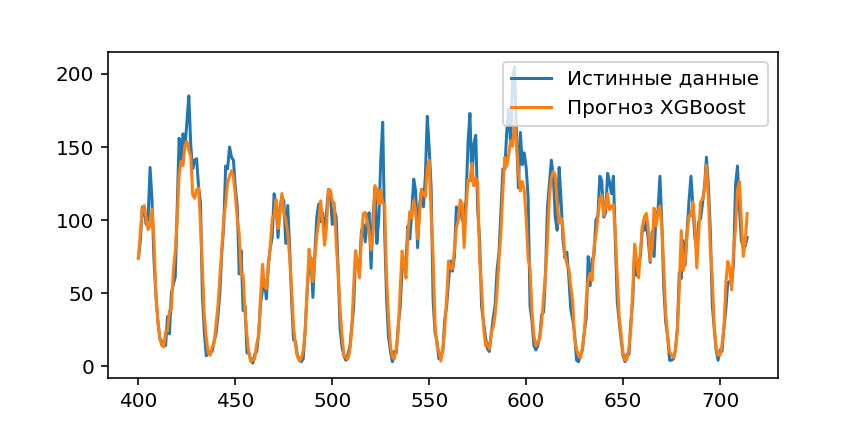

In [92]:
tabs = pn.Tabs(page1, page2)
display(tabs)